In [177]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


In [190]:
audio_dir_path = '/mnt/c/Users/pheno/Desktop/Linux Backup/Desktop/yt/Thicc Shit/'
audio_file_paths = os.listdir(audio_dir_path)
audio_file, sample_rate = librosa.load(os.path.join(audio_dir_path, audio_file_paths[14]), sr = None)
audio_file = audio_file / np.max(np.abs(audio_file))
block_size = 512
num_blocks = audio_file.shape[0] // block_size
window_size = 43
blocks = audio_file[:num_blocks * block_size].reshape(num_blocks, block_size)
print(blocks.shape)

(20893, 512)


In [249]:
beats = []
currents = []
thresholds = [0]
for i in range(num_blocks - window_size):
    window = blocks[i:i+window_size,] 
    current_energy = np.sum(blocks[i+window_size] ** 2)
    rolling_energies = np.sum(window ** 2, axis = 1)
    rolling_average_energy = np.mean(rolling_energies) 
    variance = np.mean((rolling_average_energy - rolling_energies) ** 2)
    C = ( -0.0000015 * variance + 1.5142857)
    threshold = (rolling_average_energy * C)
    thresholds.append(threshold)
    currents.append(current_energy)
    beats.append(current_energy > threshold)
    i += 1

In [250]:
listen_for = 10 * sample_rate # seconds
last = 0
result = {}
for i in range(listen_for, audio_file.shape[0], listen_for):
    tempo, beats2 = librosa.beat.beat_track(y = audio_file[last: i], sr = sample_rate, hop_length = block_size, sparse = False)
    result[f'{last/sample_rate}-{i/sample_rate}'] = int(tempo[0])
    last = i
    
print(np.mean(list(result.values())[:]))
tempo, beats2 = librosa.beat.beat_track(y = audio_file, sr = sample_rate, hop_length = block_size, sparse = False)
print(tempo)

113.5909090909091
[70.3125]


(2812.5, 3750.0)

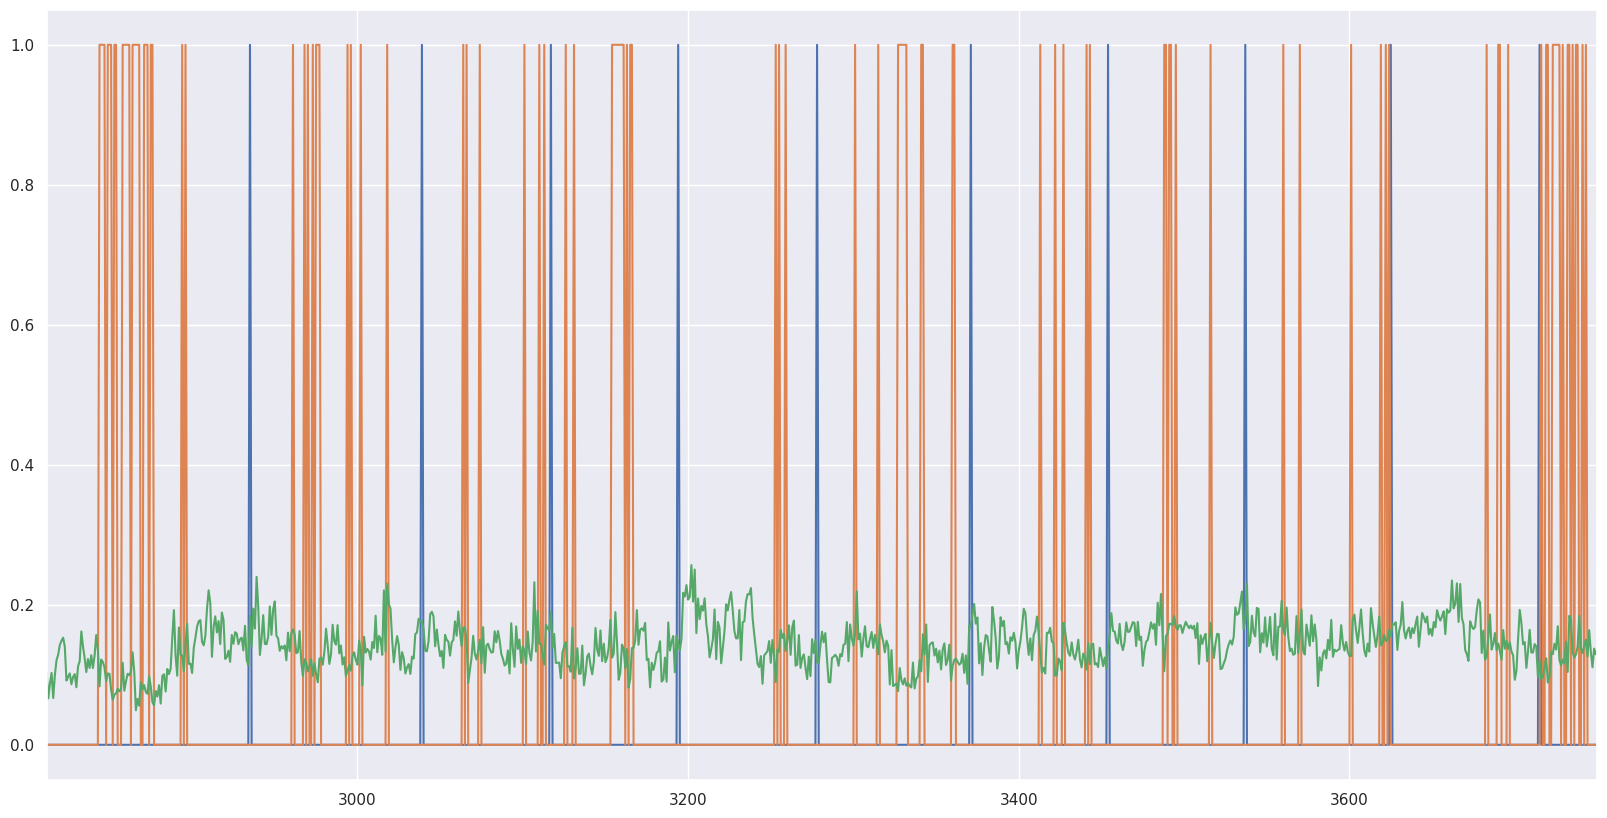

In [251]:
sns.set(rc={"figure.figsize": (20, 10)}) 

sns.lineplot(beats2)
sns.lineplot(beats)
temp = (np.sum(np.abs(blocks), axis = 1)) 
sns.lineplot(temp / max(temp))

bps = 1 / (block_size / sample_rate)
start = 30 * bps
duration = 10 * bps
plt.xlim(start, start + duration)

In [252]:
test = np.array([[-1,-2,-3],[4,5,6],[7,8,9],[10,11,12],
                 [13,14,15],[16,17,18],[19,20,21],[21,22,23]])
energies = np.sum(test[:3] ** 2, axis = 1)
average = np.mean(energies)
variance = np.mean((average - energies) ** 2)

print(f'energies = {energies}\naverage = {average}\nvariance = {variance}')

(average - energies) ** 2

energies = [ 14  77 194]
average = 95.0
variance = 5562.0


array([6561.,  324., 9801.])